# Data extraction via Logical Indexing

Sometimes we want to remove certain values from our dataset. In Numpy, this can be done with **Logical Indexing**.

### Step 1: Create a Logical Numpy Array
We can convert all of the values in an array at once with a single logical expression.

In [1]:
import numpy as np

In [2]:
data = np.array([1, 2, 3, 4, 5])

In [3]:
data < 3

array([ True,  True, False, False, False])

### Step 2: Filter with Logical Indexing
If an array of True/False values is used to index another array, and both arrays are the same size, it will return all of the values that correspond to the True values of the indexing array:

In [4]:
data = np.array([1, 2, 3, 4, 5])

In [5]:
bigger_than_3 = data > 3

In [6]:
data[bigger_than_3]

array([4, 5])

And, of course, we don't have to give our logical array a name (in this case we called it `bigger_than_3`). We can just direcly use the logical expression applied on our data as the index:

In [7]:
data[data > 3]

array([4, 5])

## Exercise

Answer the questions about the following dataset using logical indexing.

In [8]:
data = np.array([3, 1, -6, 8, 20, 2, np.nan, 7, 1, np.nan, 9, 7, 7, -7])
data

array([ 3.,  1., -6.,  8., 20.,  2., nan,  7.,  1., nan,  9.,  7.,  7.,
       -7.])

1. Which values are greater than zero?

In [9]:
data[data > 0]

array([ 3.,  1.,  8., 20.,  2.,  7.,  1.,  9.,  7.,  7.])

2. Which values are equal to 7?

In [10]:
data[data == 7]

array([7., 7., 7.])

3. Which values are greater or equal to 7?

In [11]:
data[data >= 7]

array([ 8., 20.,  7.,  9.,  7.,  7.])

4. Which values are not equal to 7?

In [12]:
data[data != 7]

array([ 3.,  1., -6.,  8., 20.,  2., nan,  1., nan,  9., -7.])

5. How many values are missing  (Tip: `np.isnan(x)`)

In [13]:
data[np.isnan(data)].shape

(2,)

6. What is the mean value of the positive numbers in this dataset?

In [14]:
data[data > 0].mean()

6.5

7. What is the mean value of the negative numbers in this dataset?

In [15]:
data[data < 0].mean()

-6.5

8. What is the percentage of missing values in this dataset?

In [16]:
100 * len(data[np.isnan(data)]) / len(data)

14.285714285714286

9. Generate a Numpy Array, call it `x`, with 1000 entries from a standard normal distribution.

In [17]:
x = np.random.randn(1000)

10. Plot a histogram of `x` where the values $\ge 0$ are specified with one color and values $< 0$ with another.

In [18]:
import matplotlib.pyplot as plt

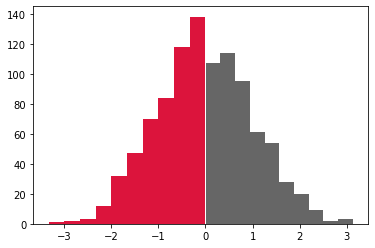

In [19]:
plt.hist(x[x>=0], color=".4")
plt.hist(x[x<0], color="crimson");

## Saving and Loading Numpy Arrays

Numpy has functions for both loading and saving Numpy Arrays. <br>
Numpy files have the `.npy` extension.

In [20]:
data = np.arange(20).reshape(5, 4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [21]:
np.save("data", data)

In [22]:
np.load("data.npy")

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

---

# More on Matplotlib

### What we did last time

In [23]:
import matplotlib.pyplot as plt

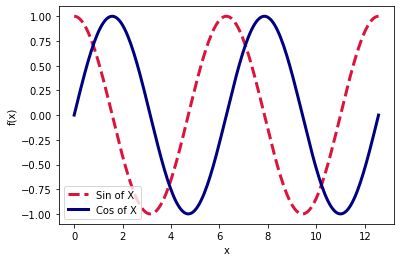

In [24]:
x = np.linspace(0, np.pi * 4, 200)
data1 = np.cos(x)
data2 = np.sin(x)

plt.plot(x, data1, color="crimson", linewidth=3, linestyle="--", label="Sin of X")
plt.plot(x, data2, color="navy", linewidth=3, label="Cos of X")

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend();

## Anatomy of matplotlib plot
In essence, there are two big components that you need to take into account:

**Figure**: The figure is the overall window or page that everything is drawn on. It’s the **top-level component** and pretty much everything (text, line plots, etc.) is defined as a component inside a single Figure.

**Axes**: To the figure you add Axes. The Axes is the area on which the data is plotted with functions such as `plt.plot()`. And, of course, a single Figure can have multiple axes resulting in a Figure with multiple subplots.

![](https://matplotlib.org/1.5.1/_images/fig_map.png)

Pretty much whatever we did before can be done with the Axes objec as well. Let's redo what we did befor but now with the Axes object and then improve our figure further.

In [25]:
import matplotlib.pyplot as plt

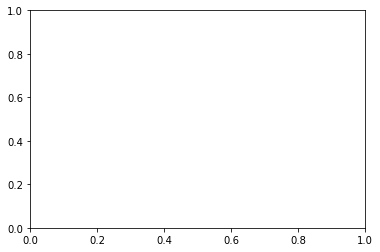

In [26]:
fig, axes = plt.subplots()

Let's recreate what we did before with the Figure and Axes object:

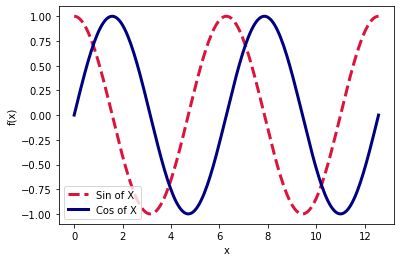

In [27]:
x = np.linspace(0, np.pi * 4, 200)
data1 = np.cos(x)
data2 = np.sin(x)

fig, ax = plt.subplots()

ax.plot(x, data1, color="crimson", linewidth=3, linestyle="--", label="Sin of X")
ax.plot(x, data2, color="navy", linewidth=3, label="Cos of X")

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

ax.legend();

And now let's improve this figure with some more lines of code and get something like this:
![matplotlib improved figure](./imgs/mpl_figure_example.png)

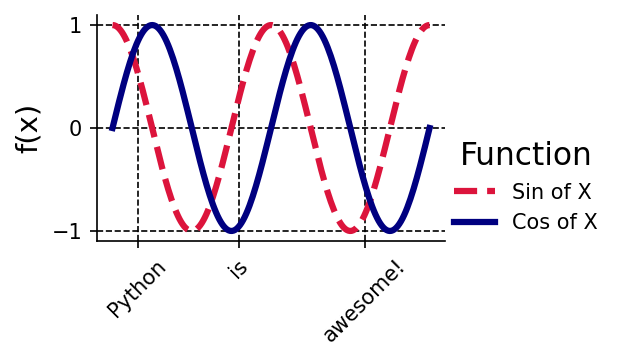

In [28]:
x = np.linspace(0, np.pi * 4, 200)
data1 = np.cos(x)
data2 = np.sin(x)

fig, ax = plt.subplots(figsize=(3, 2), dpi=150)

ax.plot(x, data1, color="crimson", linewidth=3, linestyle="--", label="Sin of X")
ax.plot(x, data2, color="navy", linewidth=3, label="Cos of X")

# ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("f(x)", fontsize=14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticks([1, 5, 10])
ax.set_xticklabels(["Python", "is", "awesome!"])
ax.tick_params(axis="x", rotation=45)

ax.set_yticks([-1, 0, 1])

ax.grid(linestyle="--", color="k")

lgnd = ax.legend(loc=(1, 0), frameon=False);
lgnd.set_title("Function", prop={"size": 15})

## Exercise

1. Reproduce the figure we just created.

2. Add a title to the figure and save it.

3. We ran an experiment that involved a subject looking at a screen while we show them different pictures on the screen. We are interested to know how the subject scans a given picture. To this end, we recorded their gaze (where they look on the screen) over time. Here we provide the data for a single image as Numpy files which you can find in the `data` folder. There are two files: 
- `gaze.npy`: subject's gaze position (x and y values)
- `timestamp.npy`: timestamp of the gaze position

Here is **the question** we would like to answer via a plot: was the subject randomly moving their eye during the experiment or was the eye movement "systematically" changing over time? In other words, was the subject focusing on different parts of the screen at different times? or not? If yes, which side was the subject focusing in the first half, which side in the second half?

Please **discuss in your group** how to generate a figure that would answer this question best. And of course, feel free to use any resource (matplotlib documentation, Google, etc.) to come up with an answer. 

**Remember**: We only discussed very few plotting functions of matplotlib and there may be other plotting functions that are better suited for visualizing the data for this problem.

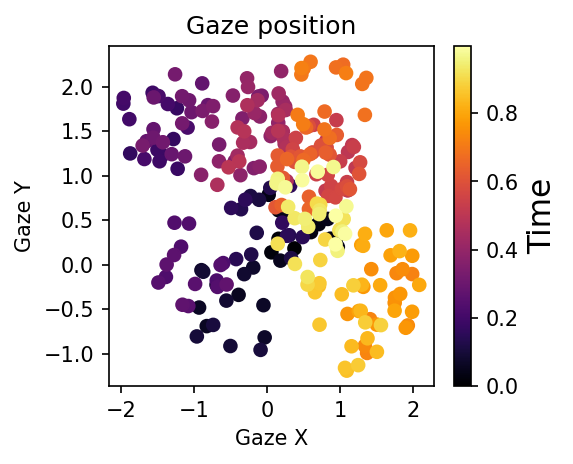

In [29]:
# load the data
gaze = np.load("./data/gaze.npy")
gaze_x = gaze[:, 0]
gaze_y = gaze[:, 1]
timestamp = np.load("./data/timestamp.npy")

# plot
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=150)
img = ax.scatter(gaze_x, gaze_y, c=timestamp, cmap="inferno")
ax.set_xlabel("Gaze X")
ax.set_ylabel("Gaze Y")
ax.set_title("Gaze position")
cb = plt.colorbar(img)
cb.ax.set_ylabel("Time", fontsize=15);

## Working with images

Image data is stored either as 2D Array (grayscale images) or as 3D Array (colored images):

- **grayscale images**: are stored as 2D Arrays where each entry specifies the *whiteness* of a pixel. Pixel values range from 0 to 255 or from 0 to 1.
- **colored (RGB) images**: have three color *channels*: red, green, blue. Each color channel on it own is a 2D Array. Putting them together results in a colored image - a 3D Array with a shape of `(heigh x width x 3)`.


This means that visualizing any image in Python can be done by "plotting" an Array!

Let's now use Matplotlib to visualize an image in our Figure. Working with images generally involves these 3 functions from Matplotlib:

| Function | Purpose  | Example |
| :----:   | :----:   | :---:   |
| **`plt.imread()`** | Loads an image from a filename  | `plt.imread("brian.png")` |
| **`plt.imshow()`** | Plots a multidimensional array as an image | `plt.imshow(my_image_array)` |
| **`plt.imsave()`** | Saves an array as an image on the computer | `plt.imsave("new_image.jpg", my_array)` |

In [30]:
# image was taken by Julia Koblitz (https://unsplash.com/photos/RlOAwXt2fEA)
img = plt.imread("./imgs/scientist.jpg")

In [31]:
img.shape

(401, 640, 3)

In [32]:
img.min()

0

In [33]:
img.max()

255

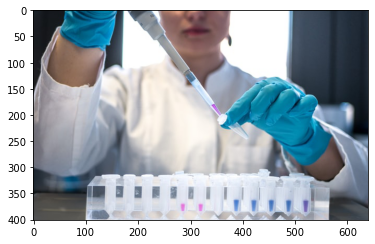

In [34]:
fig, ax = plt.subplots()

ax.imshow(img);

In [35]:
my_arr = np.random.rand(5, 5)
my_arr

array([[0.5363068 , 0.36715985, 0.68416458, 0.24318922, 0.03663532],
       [0.59194237, 0.78707043, 0.47620546, 0.54216775, 0.22574312],
       [0.83038334, 0.80992887, 0.11235996, 0.21294698, 0.561516  ],
       [0.99978041, 0.78053927, 0.97490726, 0.82609053, 0.71444569],
       [0.93656207, 0.27725689, 0.46346691, 0.75542411, 0.36948509]])

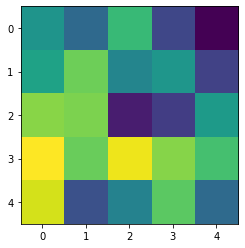

In [36]:
fig, ax = plt.subplots()

ax.imshow(my_arr);

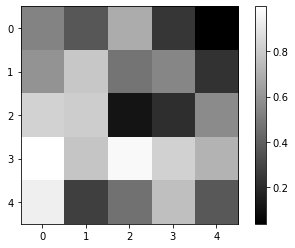

In [37]:
fig, ax = plt.subplots()

aa = ax.imshow(my_arr, cmap="gray");
plt.colorbar(aa)

You can see all available colormaps in matplotlib [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

## Exercise

1. Plot the following matrix.

In [38]:
data = np.arange(100).reshape(10, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

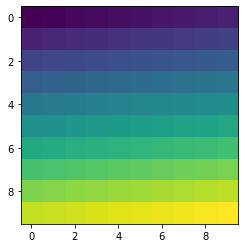

In [39]:
fig, ax = plt.subplots()

ax.imshow(data)

2. Plot the following matrix and choose a proper colormap that shows "diverging" values (i.e. one extreme is -1 and the other is 1) 

In [40]:
data = np.arange(100).reshape(10, 10) - 50
data

array([[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41],
       [-40, -39, -38, -37, -36, -35, -34, -33, -32, -31],
       [-30, -29, -28, -27, -26, -25, -24, -23, -22, -21],
       [-20, -19, -18, -17, -16, -15, -14, -13, -12, -11],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49]])

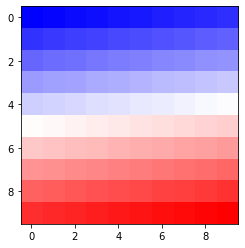

In [41]:
fig, ax = plt.subplots()

ax.imshow(data, cmap="bwr")

3. Read and plot the `emotional_eggs.jpg` image.

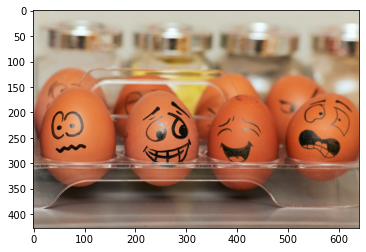

In [42]:
# Photo by Tengyart (https://unsplash.com/photos/DoqtEEn8SOo)
img = plt.imread("./imgs/emotional_eggs.jpg")

fig, ax = plt.subplots()
ax.imshow(img)

4. Transform the `emotional_eggs.jpg` image into a grayscale image (a 2D array) and plot it. To find out how to transform a colored image into a grascale image, feel free to explore matplotlib (maybe it has a function for this or not) or search online.

In [43]:
from PIL import Image
img_gs = Image.open('./imgs/emotional_eggs.jpg').convert('L')
img_gs = np.array(img_gs)

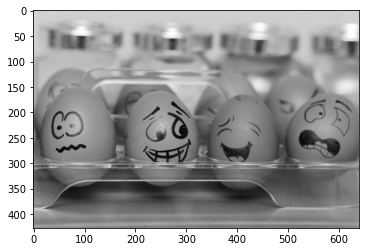

In [44]:
fig, ax = plt.subplots()
ax.imshow(img_gs, cmap="gray");

5. Save the grayscale version of `emotional_eggs.jpg` image as `emotional_eggs_gs.jpg`.

In [45]:
plt.imsave("emotional_eggs_gs.jpg", img_gs, cmap="gray")

## Subplots: multiple Axes in a single Figure

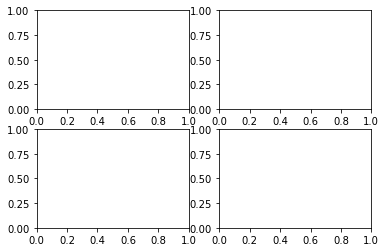

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2)

In [47]:
axes.shape

(2, 2)

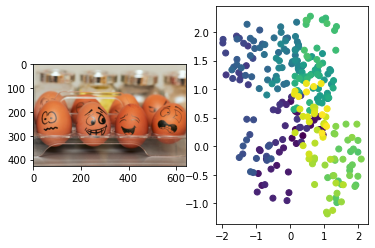

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(img)
axes[1].scatter(gaze_x, gaze_y, c=timestamp)

## Exercise

1. Create a Figure with 3 subplots (1 row, 3 columns) and plot the following on each Axes:
- left Axes: histogram of `data1`.
- middle Axes: histogram of `data2`.
- right Axes: scatter plot of `data1` vs `data2`.

In [49]:
data1 = np.load("./data/subplots_data1.npy")
data2 = np.load("./data/subplots_data2.npy")

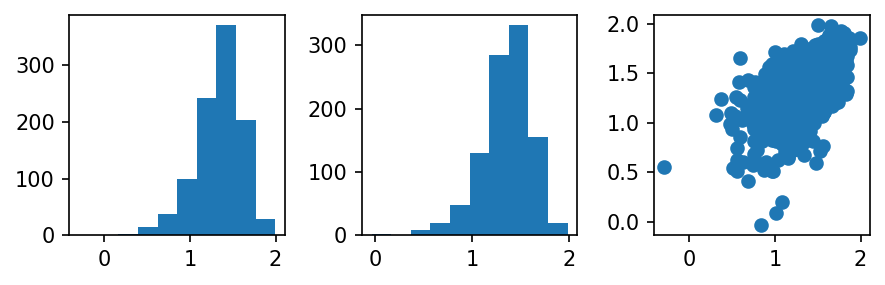

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 2), dpi=150)

axes[0].hist(data1)
axes[1].hist(data2)
axes[2].scatter(data1, data2)

fig.tight_layout()

2. Let improve on the plot we created in previous exercise and position the Axes objects better.

There is a package called [`figrid`](https://github.com/dougollerenshaw/figrid) which provides an easy way to create Axes objects at any location and size you like in a Figure.

Install the package and create a Figure that looks like this:

![figrid plot](./imgs/subplots_figure_figrid.png)

In [51]:
!pip install figrid

In [52]:
import figrid as fg

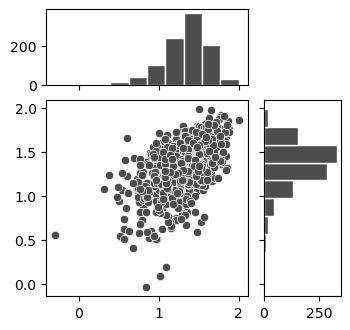

In [53]:
fig = plt.figure(figsize=(4, 4), dpi=100)
axes = {
    'panel_A': fg.place_axes_on_grid(fig, xspan=[0.05, 0.7], yspan=[0.35, 1.]),
    'panel_B': fg.place_axes_on_grid(fig, xspan=[0.05, 0.7], yspan=[0.05, 0.3]),
    'panel_C': fg.place_axes_on_grid(fig, xspan=[0.75, 1.], yspan=[0.35, 1.]),
}

axes["panel_A"].scatter(data1, data2, color=".3", edgecolor="w", linewidth=.5)

axes["panel_B"].hist(data1, color=".3", edgecolor="w")
axes["panel_B"].set_xticklabels([])

axes["panel_C"].hist(data2, orientation="horizontal", color=".3", edgecolor="w")
axes["panel_C"].set_yticklabels([]);